## Observations and Insights 

* Observation 1
* Observation 2
* Observation 3

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata_df, study_results_df, how="inner")

# Display the data table for preview
# html = combine_data_df.head().to_html()
# print(html)
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice_id_count = len(combine_data_df["Mouse ID"].unique())
print(f"Unique Mice Id's: {unique_mice_id_count}")

Unique Mice Id's: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combine_data_df[combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"]
duplicate_mice_df.head()

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_data_df[combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_id_count = len(clean_df["Mouse ID"].unique())
print(f"Unique Mice Ids: {unique_mice_id_count}")

Unique Mice Ids: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_min_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_min_group = clean_min_df.groupby(["Drug Regimen"])

mean_vol = clean_min_group["Tumor Volume (mm3)"].mean().map("{:.2f}".format)
median_vol = clean_min_group["Tumor Volume (mm3)"].median().map("{:.2f}".format)
mode1_vol = clean_min_group["Tumor Volume (mm3)"].apply(lambda x: x.mode().iloc[0]).map("{:.2f}".format)
mode2_vol = clean_min_group["Tumor Volume (mm3)"].agg(pd.Series.mode).map("{:.2f}".format)
var_vol = clean_min_group["Tumor Volume (mm3)"].var().map("{:.2f}".format)
std_vol = clean_min_group["Tumor Volume (mm3)"].std().map("{:.2f}".format)
sem_vol = clean_min_group["Tumor Volume (mm3)"].sem().map("{:.2f}".format)

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
                            "Mean": mean_vol,
                            "Median": median_vol,
                            "Mode": mode1_vol,
                            "Variance": var_vol,
                            "Standard Deviation": std_vol,
                            "SEM": sem_vol
                         })
summary_df

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.39,50.91,45.00,43.14,6.57,0.53
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_agg_group = clean_min_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', lambda x: x.mode().iloc[0], 'var', 'std', 'sem']})
clean_agg_group.rename(columns={"<lambda_0>": "mode"}, inplace=True)
# print(list(clean_agg_group.columns.values))
# clean_agg_group[('Tumor Volume (mm3)', 'mean')] = clean_agg_group[('Tumor Volume (mm3)', 'mean')].map("{:.2f}".format)
clean_agg_group

Tumor Volume (mm3)                                        \
                           mean     median  mode        var       std   
Drug Regimen                                                            
Capomulin             40.675741  41.557809  45.0  24.947764  4.994774   
Ceftamin              52.591172  51.776157  45.0  39.290177  6.268188   
Infubinol             52.884795  51.820584  45.0  43.128684  6.567243   
Ketapril              55.235638  53.698743  45.0  68.553577  8.279709   
Naftisol              54.331565  52.509285  45.0  66.173479  8.134708   
Placebo               54.033581  52.288934  45.0  61.168083  7.821003   
Propriva              52.393463  50.909965  45.0  43.138803  6.568014   
Ramicane              40.216745  40.673236  45.0  23.486704  4.846308   
Stelasyn              54.233149  52.431737  45.0  59.450562  7.710419   
Zoniferol             53.236507  51.818479  45.0  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

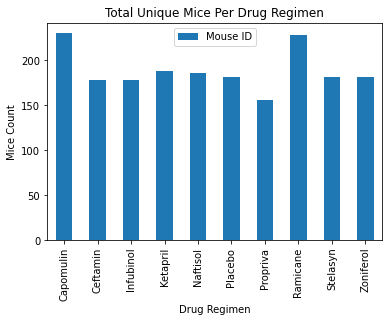

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_min_df = clean_df[["Drug Regimen", "Mouse ID"]]
clean_min_group = clean_min_df.groupby(["Drug Regimen"]).count()
clean_min_group.plot(kind="bar")
plt.title("Total Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.savefig("./Images/TotalUniqueMiceBar_pandas.png")
plt.show()

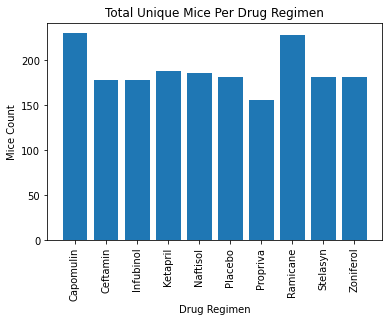

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen_list = clean_min_group.index.values.tolist()
# print(drug_regimen_list)
plt.bar(drug_regimen_list, clean_min_group["Mouse ID"])
plt.xticks(rotation="vertical")
plt.title("Total Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.savefig("./Images/TotalUniqueMiceBar_pyplot.png")
plt.show()

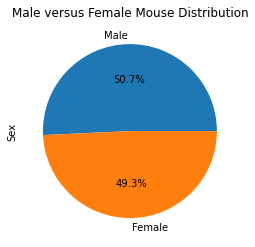

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Male versus Female Mouse Distribution")
plt.savefig("./Images/MalevFemailDist_pandas.png")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
